In [1]:
from scipy import stats
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SEED = 1234
rnd = np.random.RandomState(SEED)

## Classification Tree

In [19]:
# Read data
data = load_breast_cancer()
print(f"Features names: {data.feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(data.data[:, [0, 7]], data.target, test_size=0.3, random_state=rnd, stratify=data.target)
print(f"Features examples: {X_train[:5]}")
print(f"Targets examples: {y_train[:5]}")

Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Features examples: [[ 8.219    0.02168]
 [11.06     0.04268]
 [13.61     0.04489]
 [17.46     0.08811]
 [19.73     0.0974 ]]
Targets examples: [1 1 0 0 0]


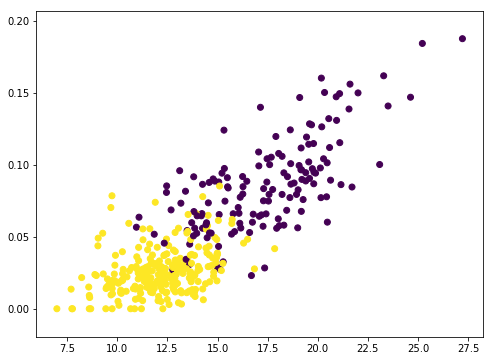

In [21]:
# Visualize data
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()


In [23]:
print(f"Stats for 'mean radius': {stats.describe(X_train[:, 0])}")
print(f"Stats for 'mean concave points': {stats.describe(X_train[:, 1])}")

Stats for 'mean radius': DescribeResult(nobs=398, minmax=(6.981, 27.22), mean=14.11162311557789, variance=11.749425454577674, skewness=0.7573855964404447, kurtosis=0.3118056749981126)
Stats for 'mean concave points': DescribeResult(nobs=398, minmax=(0.0, 0.1878), mean=0.048504432160804016, variance=0.0013905099468102477, skewness=1.098040480406223, kurtosis=0.784797877382839)


In [31]:
tree_classifier = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)
predictions = tree_classifier.predict(X_test)
acccuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {acccuracy}")

Accuracy: 0.9064327485380117


In [32]:
tree_classifier.feature_importances_

array([0.14608173, 0.85391827])

## Regression Tree and Bias - Variance tradeoff

1. Calculate cross validation metrics, for example MSE
2. Calculate mean of MSE
3. Calculate MSE on the whole train dataset
4. Compare Mean MSE with Train MSE. If Mean MSE is more, then model is overfitting and we should decrease model complexity. If Mean MSE is close to Train MSE and much more than expected error, so the model is underfitting  and we should increase model complexity.

In [39]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [69]:
seed = 1234
X, y = make_regression(n_samples=400, n_features=10, n_informative=10, noise=2, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=seed)

dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.15, random_state=seed)

MSE_cv_train = - cross_val_score(estimator=dt, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=10)
print(f"MSE CV mean: {MSE_cv_train.mean()}")

MSE_train = MSE(y_train, dt.fit(X_train, y_train).predict(X_train))
print(f"MSE train: {MSE_train}")

MSE_test = MSE(y_test, dt.predict(X_test))
print(f"MSE test: {MSE_test}")

MSE CV mean: 17342.805938661033
MSE train: 13904.796363449894
MSE test: 20552.771579819426


## Voting Classifier

In [73]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [71]:
# Read data
data = load_breast_cancer()
print(f"Features names: {data.feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(data.data[:, :], data.target, test_size=0.3, random_state=rnd, stratify=data.target)
print(f"Features examples: {X_train[:5]}")
print(f"Targets examples: {y_train[:5]}")

Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Features examples: [[1.720e+01 2.452e+01 1.142e+02 9.294e+02 1.071e-01 1.830e-01 1.692e-01
  7.944e-02 1.927e-01 6.487e-02 5.907e-01 1.041e+00 3.705e+00 6.947e+01
  5.820e-03 5.616e-02 4.252e-02 1.127e-02 1.527e-02 6.299e-03 2.332e+01
  3.382e+01 1.516e+02 1.681e+03 1.585e-01 7.394e-01 6.566e-01 1.899e-01
  3.313e-01 1.339e-01]
 [1.171e+01 1.545e+01 7.503e+01 4.203e+02 1.150e-01 7.281e-02 4.006e-02
  3.250e-02 2.009e-01 6.506

In [76]:
# Create different classifiers
seed = 1234
log_reg_clf = LogisticRegression(random_state=seed)
knn = KNeighborsClassifier(n_neighbors=15)
tree_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.15, random_state=seed)

classifiers = [
    ('logistic', log_reg_clf),
    ('knn', knn),
    ('tree_clf', tree_clf)
]

for name, method in classifiers:
    model = method.fit(X_train, y_train)
    print(f"Accuracy of {name}: {accuracy_score(y_test, model.predict(X_test))}")

vote_clf = VotingClassifier(estimators=classifiers, voting='hard').fit(X_train, y_train)
print(f"Accuracy of Voting Classifier: {accuracy_score(y_test, vote_clf.predict(X_test))}")

Accuracy of logistic: 0.9532163742690059
Accuracy of knn: 0.935672514619883
Accuracy of tree_clf: 0.9239766081871345
Accuracy of Voting Classifier: 0.9415204678362573


c:\users\sergei\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sergei\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Bagging Classifier

In [77]:
from sklearn.ensemble import BaggingClassifier

In [78]:
seed = 1234
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.15, random_state=seed)
print(f"Decision tree accuracy: {accuracy_score(y_test, dt.fit(X_train, y_train).predict(X_test))}")
bagging_clf = BaggingClassifier(base_estimator=dt, n_estimators=20, max_features=1.0, random_state=seed)
print(f"Bagging accuracy: {accuracy_score(y_test, bagging_clf.fit(X_train, y_train).predict(X_test))}")

Decision tree accuracy: 0.9239766081871345
Bagging accuracy: 0.9649122807017544


### Out-of-bag evaluation

In [79]:
seed = 1234
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.15, random_state=seed)
bagging_clf = BaggingClassifier(base_estimator=dt, n_estimators=20, max_features=1.0,
                                oob_score=True, random_state=seed)
bagging_clf.fit(X_train, y_train)
print(f"Bagging oob: {bagging_clf.oob_score_}")

Bagging oob: 0.9095477386934674


## AdaBoost (Adaptive boosting)

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [3]:
# Read data
data = load_breast_cancer()
print(f"Features names: {data.feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(data.data[:, :], data.target, test_size=0.3, random_state=rnd, stratify=data.target)
print(f"Features examples: {X_train[:5]}")
print(f"Targets examples: {y_train[:5]}")

Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Features examples: [[1.080e+01 2.198e+01 6.879e+01 3.599e+02 8.801e-02 5.743e-02 3.614e-02
  1.404e-02 2.016e-01 5.977e-02 3.077e-01 1.621e+00 2.240e+00 2.020e+01
  6.543e-03 2.148e-02 2.991e-02 1.045e-02 1.844e-02 2.690e-03 1.276e+01
  3.204e+01 8.369e+01 4.895e+02 1.303e-01 1.696e-01 1.927e-01 7.485e-02
  2.965e-01 7.662e-02]
 [2.044e+01 2.178e+01 1.338e+02 1.293e+03 9.150e-02 1.131e-01 9.799e-02
  7.785e-02 1.618e-01 5.557

In [6]:
seed = 1
dt = DecisionTreeClassifier(max_depth=1, random_state=seed)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=1, random_state=seed)
adb_clf.fit(X_train, y_train)
predict_proba = adb_clf.predict_proba(X_test)
print(f"ROC_AUC_SCORE: {roc_auc_score(y_test, predict_proba[:, 1])}")

ROC_AUC_SCORE: 0.9840829439252337


## Gradient Tree Boosting

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# Read data
data = load_breast_cancer()
print(f"Features names: {data.feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(data.data[:, :], data.target, test_size=0.3, random_state=rnd, stratify=data.target)
print(f"Features examples: {X_train[:5]}")
print(f"Targets examples: {y_train[:5]}")

Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Features examples: [[1.080e+01 2.198e+01 6.879e+01 3.599e+02 8.801e-02 5.743e-02 3.614e-02
  1.404e-02 2.016e-01 5.977e-02 3.077e-01 1.621e+00 2.240e+00 2.020e+01
  6.543e-03 2.148e-02 2.991e-02 1.045e-02 1.844e-02 2.690e-03 1.276e+01
  3.204e+01 8.369e+01 4.895e+02 1.303e-01 1.696e-01 1.927e-01 7.485e-02
  2.965e-01 7.662e-02]
 [2.044e+01 2.178e+01 1.338e+02 1.293e+03 9.150e-02 1.131e-01 9.799e-02
  7.785e-02 1.618e-01 5.557

In [4]:
seed = 1
gbt = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=1)
gbt.fit(X_train, y_train)
print(f"Accuracy score: {accuracy_score(y_test, gbt.predict(X_test))}")

Accuracy score: 0.9883040935672515


## Grid Search

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Read data
data = load_breast_cancer()
print(f"Features names: {data.feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(data.data[:, :], data.target, test_size=0.3, random_state=rnd, stratify=data.target)
print(f"Features examples: {X_train[:5]}")
print(f"Targets examples: {y_train[:5]}")

In [13]:
dt = DecisionTreeClassifier()
print(f"Parameters: {dt.get_params()}")
params = {
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [0.16, 0.25, 0.3]
}
estimator = GridSearchCV(
    estimator = dt,
    param_grid = params,
    scoring = 'roc_auc',
    cv = 5
)

estimator.fit(X_train, y_train)
print(f"Best params: {estimator.best_params_}")
print(f"Best score: {estimator.best_score_}")

model = estimator.best_estimator_
print(f"AUC score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")
print(f"Accuracy score: {model.score(X_test, y_test)}")

Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Best params: {'max_depth': 3, 'min_samples_leaf': 0.16}
Best score: 0.9523655172413793
AUC score: 0.9581629672897196
Accuracy score: 0.9064327485380117
